In [1]:
import wordcloud as wc
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

Make sure to download the model first using:

`spacy download nl_core_news_sm`

In [2]:
import spacy
nlp = spacy.load('nl_core_news_sm')

Load data from CSV file using pandas

In [3]:
df = pd.read_csv('data/BGT-Bijbel.csv', sep='|')

books = df['book'].unique()
books

array(['Genesis', 'Exodus', 'Leviticus', 'Numeri', 'Deuteronomium',
       'Jozua', 'Richteren', 'Ruth', '1-Samuel', '2-Samuel', '1-Koningen',
       '2-Koningen', '1-Kronieken', '2-Kronieken', 'Ezra', 'Nehemia',
       'Esther', 'Job', 'Psalmen', 'Spreuken', 'Prediker', 'Hooglied',
       'Jesaja', 'Jeremia', 'Klaagliederen', 'Ezechiël', 'Daniël',
       'Hosea', 'Joël', 'Amos', 'Obadja', 'Jona', 'Micha', 'Nahum',
       'Habakuk', 'Sefanja', 'Haggai', 'Zacharia', 'Maleachi', 'Matteüs',
       'Marcus', 'Lucas', 'Johannes', 'Handelingen', 'Romeinen',
       '1-Korintiërs', '2-Korintiërs', 'Galaten', 'Efeziërs',
       'Filippenzen', 'Kolossenzen', '1-Tessalonicenzen',
       '2-Tessalonicenzen', '1-Timoteüs', '2-Timoteüs', 'Titus',
       'Filemon', 'Hebreeën', 'Jakobus', '1-Petrus', '2-Petrus',
       '1-Johannes', '2-Johannes', '3-Johannes', 'Judas', 'Openbaring'],
      dtype=object)

Generate word counts

In [4]:
poss = ('NOUN', 'PROPN', 'ADJ', 'VERB')

def get_counts(book):
    text = ' '.join(df[df['book'] == book]['text'])
    doc = nlp(text)
    tokens = (token.text for token in doc if token.pos_ in poss)
    return Counter(tokens)

# get_counts('Genesis').most_common(10)

Generate word clouds

In [5]:
def get_wordcloud(counts, colormap='rainbow'):
    wordcloud = wc.WordCloud(
        width=800, 
        height=500, 
        colormap=colormap, 
        background_color=None,
        mode='RGBA',
    ).generate_from_frequencies(counts)
    
    return wordcloud

Generate word clouds for all books using matplotlib and/or save them to svg 

In [6]:
plot = False
svg = True

all_counts = Counter()

for book in books:
    counts = get_counts(book)
    wordcloud = get_wordcloud(counts)
    
    all_counts.update(counts)

    if plot:
        fig, ax = plt.subplots(figsize=(6,6))
    
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.set_axis_off()
        ax.set_title(book)
        plt.show()
    if svg:
        with open(f'{book}.svg', 'w') as f:
            f.write(wordcloud.to_svg(embed_font=True))
        print(f'wrote {book}.svg' )   

wrote Genesis.svg
wrote Exodus.svg
wrote Leviticus.svg
wrote Numeri.svg
wrote Deuteronomium.svg
wrote Jozua.svg
wrote Richteren.svg
wrote Ruth.svg
wrote 1-Samuel.svg
wrote 2-Samuel.svg
wrote 1-Koningen.svg
wrote 2-Koningen.svg
wrote 1-Kronieken.svg
wrote 2-Kronieken.svg
wrote Ezra.svg
wrote Nehemia.svg
wrote Esther.svg
wrote Job.svg
wrote Psalmen.svg
wrote Spreuken.svg
wrote Prediker.svg
wrote Hooglied.svg
wrote Jesaja.svg
wrote Jeremia.svg
wrote Klaagliederen.svg
wrote Ezechiël.svg
wrote Daniël.svg
wrote Hosea.svg
wrote Joël.svg
wrote Amos.svg
wrote Obadja.svg
wrote Jona.svg
wrote Micha.svg
wrote Nahum.svg
wrote Habakuk.svg
wrote Sefanja.svg
wrote Haggai.svg
wrote Zacharia.svg
wrote Maleachi.svg
wrote Matteüs.svg
wrote Marcus.svg
wrote Lucas.svg
wrote Johannes.svg
wrote Handelingen.svg
wrote Romeinen.svg
wrote 1-Korintiërs.svg
wrote 2-Korintiërs.svg
wrote Galaten.svg
wrote Efeziërs.svg
wrote Filippenzen.svg
wrote Kolossenzen.svg
wrote 1-Tessalonicenzen.svg
wrote 2-Tessalonicenzen.svg


Generate word cloud for entire bible

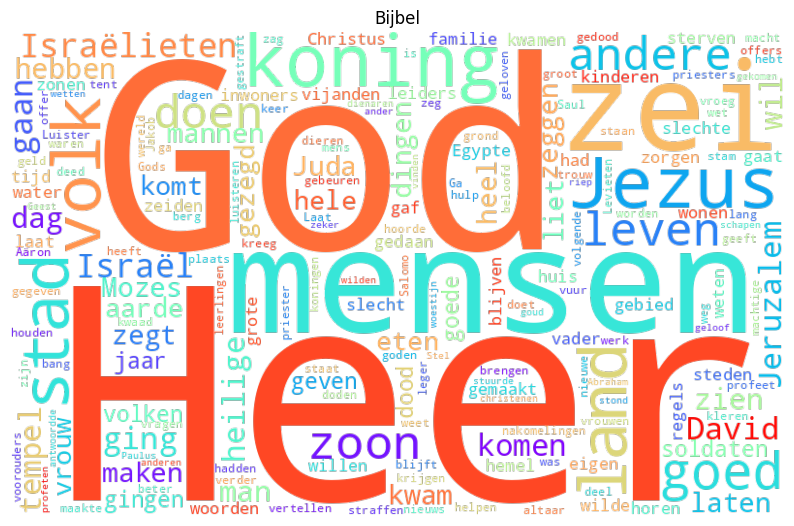

wrote bible.svg


In [7]:
svg = True
plot = True

wordcloud = get_wordcloud(all_counts, colormap='rainbow')

if plot:
    fig, ax = plt.subplots(figsize=(10,10))

    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_axis_off()
    ax.set_title('Bijbel')
    plt.show()
    
if svg:
    with open(f'bible.svg', 'w') as f:
        f.write(wordcloud.to_svg(embed_font=True))
    print(f'wrote bible.svg' )